In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import warnings
warnings.filterwarnings('ignore')

parser = lambda dates: pd.datetime.strptime(dates,"%d/%m/%y")
dataset = pd.read_csv(r"C:\Users\kelvin\Downloads\archive (30)\raw_sales.csv",parse_dates=[0])
dataset['datesold'] = pd.to_datetime(dataset['datesold'])
# ,infer_datetime_format=True)
indexedDataset= dataset.set_index(['datesold'])
df= pd.DataFrame(indexedDataset['price'],columns=['price'])
df.index.name='date'
# df=dataset
data=df
data.tail()

,price
date,
2019-07-25,500000
2019-07-25,560000
2019-07-26,464950
2019-07-26,589000
2019-07-26,775000


In [2]:
data.shape[0]

29580

In [3]:
from statsmodels.tsa.stattools import adfuller
dfimput = adfuller(data['price'],autolag= 'AIC')

dfoutput = pd.Series(dfimput[0:4],index=['Test Statistic','p-value','Lags uesd','Number of Observations'])
for key,value in dfimput[4].items():
    dfoutput['critical value (%s)'%key] = value
dfoutput

Test Statistic           -1.043503e+01
p-value                   1.574525e-18
Lags uesd                 5.000000e+01
Number of Observations    2.952900e+04
critical value (1%)      -3.430571e+00
critical value (5%)      -2.861638e+00
critical value (10%)     -2.566822e+00
dtype: float64

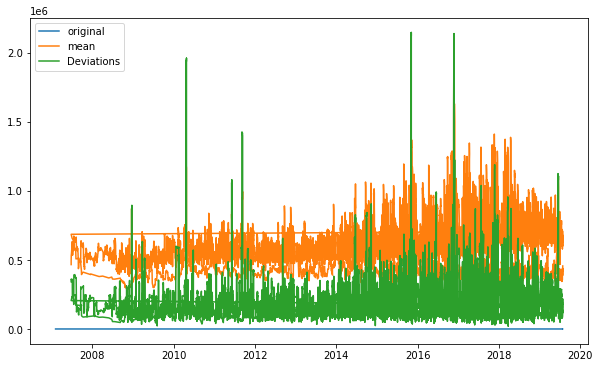

In [4]:
df1_log = np.log(data['price'])
MeanAvg = data['price'].rolling(window=12).mean()
STD= data['price'].rolling(window=12).std()

plt.plot(df1_log,label='original')
plt.plot(MeanAvg,label='mean')
plt.plot(STD,label='Deviations')
plt.legend(loc=2);

In [5]:
df1_log = df1_log-MeanAvg
df1_log.dropna(inplace=True)
df1_log.head(10)

date
2007-06-27   -466320.705266
2007-06-27   -493403.013675
2007-06-28   -532986.452369
2007-06-30   -548736.844202
2007-07-02   -583736.407633
2007-07-03   -585903.941800
2007-07-06   -591736.809978
2007-07-07   -633486.289850
2007-07-08   -533237.302285
2007-07-12   -538945.367624
Name: price, dtype: float64

In [6]:
def stationary_func(timeseries):
    MeanAvg = timeseries.rolling(window=12).mean()
    STD= timeseries.rolling(window=12).std()
    
    plt.plot(timeseries,color='g',label='orig')
    plt.plot( MeanAvg,color='b',label='Mean')
    plt.plot(STD,color='r',label='Standard Deviation')
    plt.plot(loc='block')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    from statsmodels.tsa.stattools import adfuller
    dfimput = adfuller(data['price'],autolag= 'AIC')

    dfoutput = pd.Series(dfimput[0:4],index=['Test Statistic','p-value','Lags uesd','Number of Observations'])
    for key,value in dfimput[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)  

Test Statistic           -1.043503e+01
p-value                   1.574525e-18
Lags uesd                 5.000000e+01
Number of Observations    2.952900e+04
critical value (1%)      -3.430571e+00
critical value (5%)      -2.861638e+00
critical value (10%)     -2.566822e+00
dtype: float64


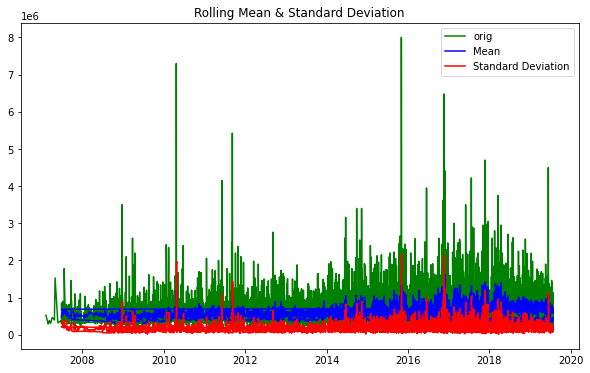

In [7]:
stationary_func(data)

Test Statistic           -1.043503e+01
p-value                   1.574525e-18
Lags uesd                 5.000000e+01
Number of Observations    2.952900e+04
critical value (1%)      -3.430571e+00
critical value (5%)      -2.861638e+00
critical value (10%)     -2.566822e+00
dtype: float64


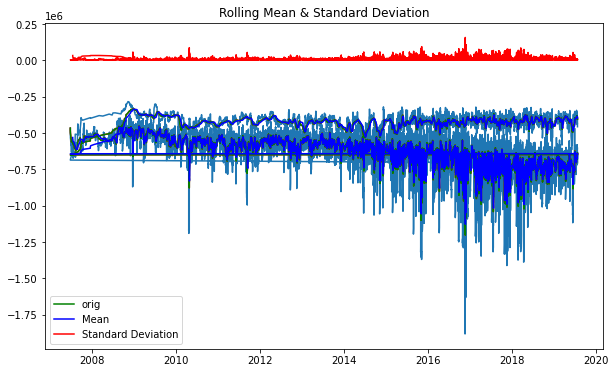

In [8]:
exponentialDecayWeightedAverage = df1_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df1_log)
plt.plot(exponentialDecayWeightedAverage,color='r');
stationary_func(exponentialDecayWeightedAverage)

Test Statistic           -1.043503e+01
p-value                   1.574525e-18
Lags uesd                 5.000000e+01
Number of Observations    2.952900e+04
critical value (1%)      -3.430571e+00
critical value (5%)      -2.861638e+00
critical value (10%)     -2.566822e+00
dtype: float64


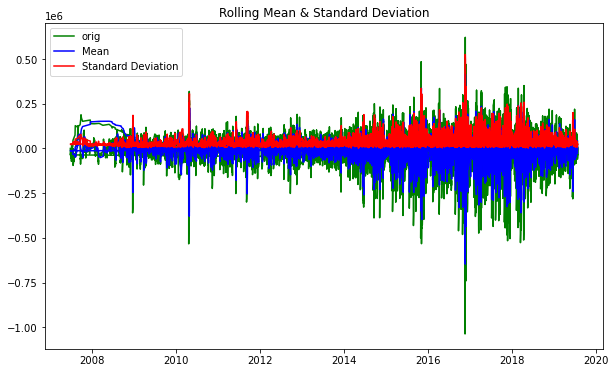

In [9]:
df1Log = df1_log - exponentialDecayWeightedAverage
stationary_func(df1Log)

In [10]:
from datetime import datetime
import statsmodels.api as sm
import statsmodels as sm

from statsmodels.tsa.seasonal import seasonal_decompose
def seasonal_decomp(df, model="additive"):
    seasonal_df = None
    seasonal_df = seasonal_decompose(df, model='additive',period=1)

    
    return seasonal_df

In [11]:
seasonal_decomp(data)

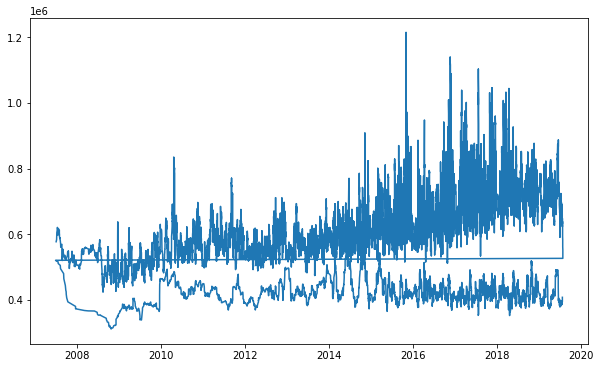

In [12]:
result = seasonal_decompose(df, model='additive',period=30)
plt.plot(result.trend);

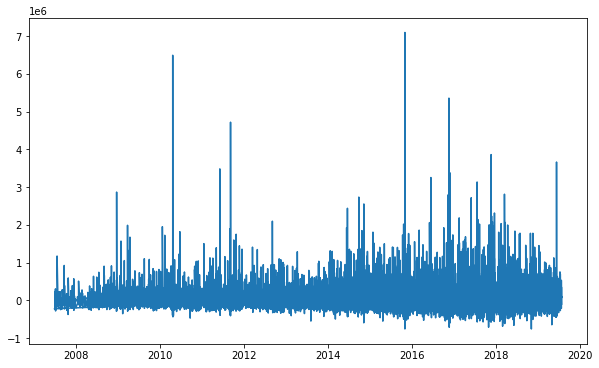

In [13]:
plt.plot(result.resid);

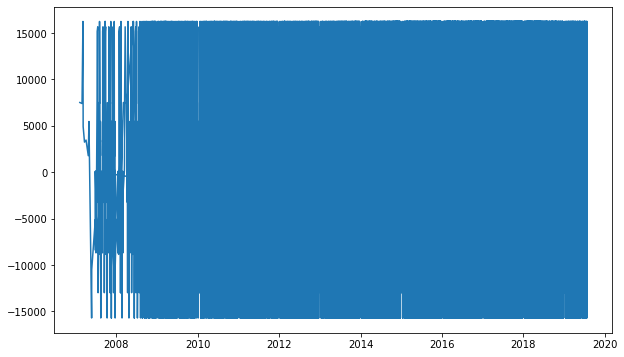

In [14]:
plt.plot(result.seasonal);

Test Statistic           -1.043503e+01
p-value                   1.574525e-18
Lags uesd                 5.000000e+01
Number of Observations    2.952900e+04
critical value (1%)      -3.430571e+00
critical value (5%)      -2.861638e+00
critical value (10%)     -2.566822e+00
dtype: float64


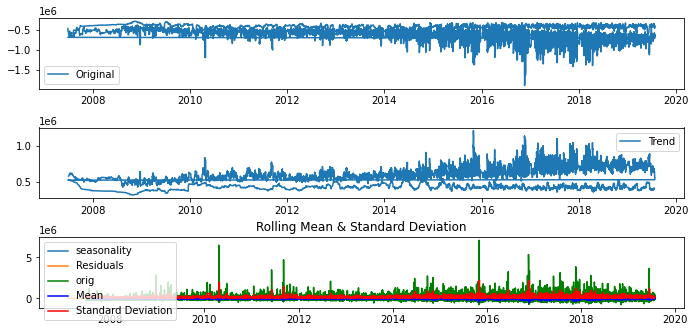

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#missing
decomposition = seasonal_decompose(df, model='additive',period=30)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1_log,label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
stationary_func(decomposedLogData)

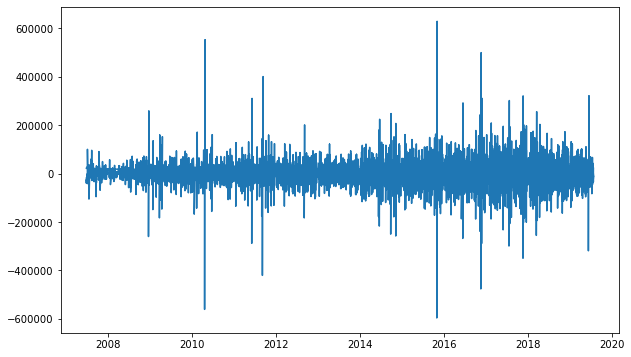

In [16]:
datasetlogdiff = df1_log  - df1_log.shift()
plt.plot(datasetlogdiff)

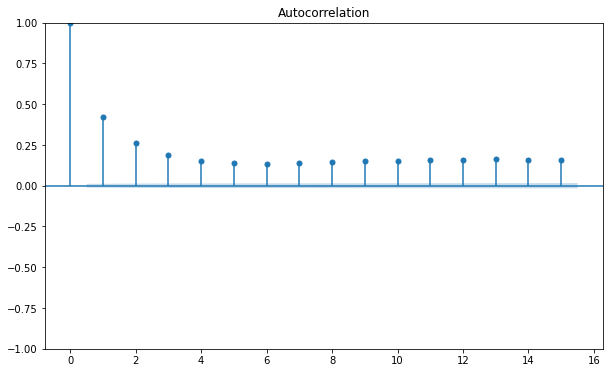

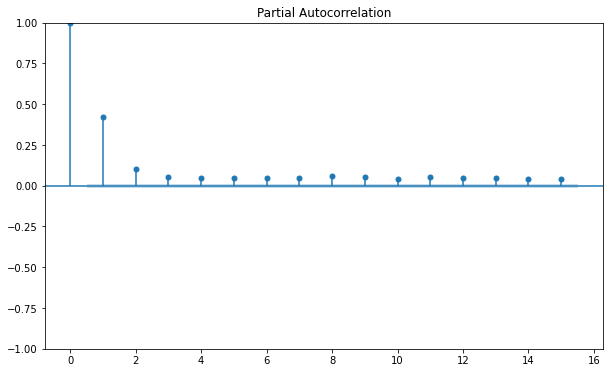

In [17]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm

# lag_acf = acf(datasetlogdiff,nlags=20)
# lag_pcf = pacf(datasetlogdiff,nlags=20,method='ols')

sm.graphics.tsa.plot_acf(df['price'].values.squeeze(),lags=15)
sm.graphics.tsa.plot_pacf(df['price'].values.squeeze(),lags=15)
plt.show()

In [18]:
# pip install pmdarima

In [19]:
from pmdarima import auto_arima

In [20]:
# import warnings
# warnings.filterwarnings("ignore")
  
# # Fit auto_arima function to AirPassengers dataset
# stepwise_fit = auto_arima(data['price'], start_p = 1, start_q = 1,
#                           max_p = 3, max_q = 3, m = 12,
#                           start_P = 0, seasonal = True,
#                           d = None, D = 1, trace = True,
#                           error_action ='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings = True,  # we don't want convergence warnings
#                           stepwise = True)           # set to stepwise
  
# # To print the summary
# stepwise_fit.summary()

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
datasetlogdiff.dropna(inplace=True)
datasetlogdiff

date
2007-06-27   -27082.308409
2007-06-28   -39583.438694
2007-06-30   -15750.391833
2007-07-02   -34999.563431
2007-07-03    -2167.534167
                  ...     
2019-07-25   -13337.448707
2019-07-25    -9166.553338
2019-07-26     -416.852674
2019-07-26    -4499.763504
2019-07-26   -18753.892230
Name: price, Length: 29568, dtype: float64

In [23]:
datasetlogshift = df1_log - df1_log.shift(1)
datasetlogshift.dropna(inplace=True)

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Plotting AR Model


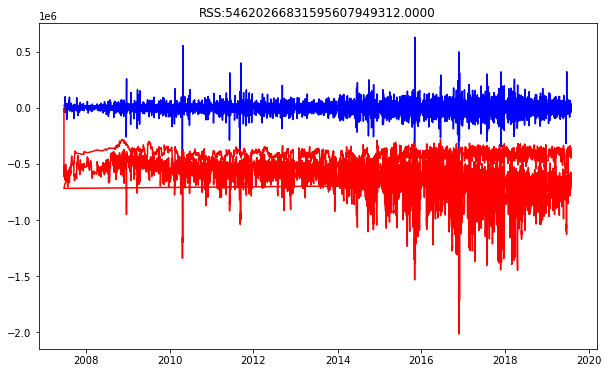

In [24]:
# import warnings
# warnings.filterwarnings('ignore')

model = sm.tsa.arima.ARIMA(df1_log,order=(2,1,2))
result = model.fit()
plt.plot(datasetlogshift,color='b')
plt.plot(result.fittedvalues,color='r')
plt.title('RSS:%.4f'%sum(result.fittedvalues - datasetlogshift)**2)
print('Plotting AR Model')

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Plotting AR Model


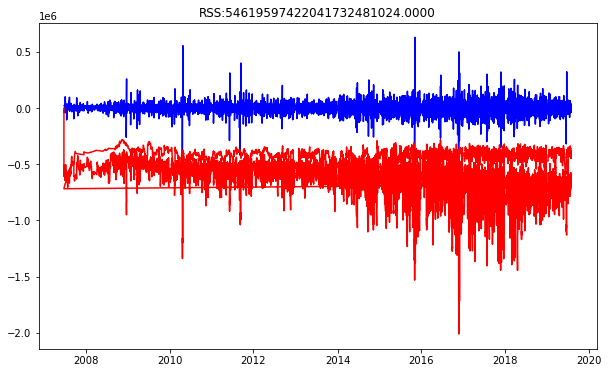

In [25]:
model = sm.tsa.arima.ARIMA(df1_log,order=(0,1,2))
result = model.fit()
plt.plot(datasetlogshift,color='b')
plt.plot(result.fittedvalues,color='r')
plt.title('RSS:%.4f'%sum(result.fittedvalues - datasetlogshift)**2)
print('Plotting AR Model')

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Plotting AR Model


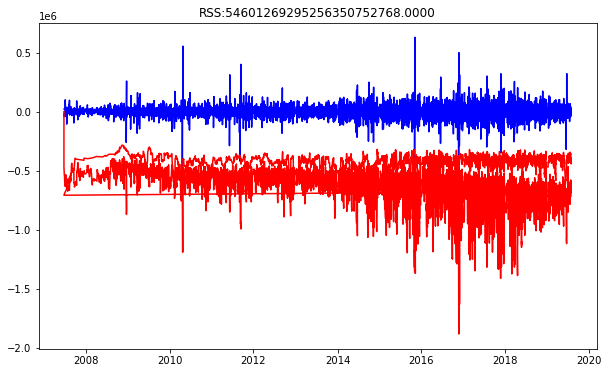

In [26]:
model = sm.tsa.arima.ARIMA(df1_log,order=(0,1,0))
result = model.fit()
plt.plot(datasetlogshift,color='b')
plt.plot(result.fittedvalues,color='r')
plt.title('RSS:%.4f'%sum(result.fittedvalues - datasetlogshift)**2)
print('Plotting AR Model')

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                29569
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -347183.039
Date:                Fri, 31 Mar 2023   AIC                         694368.078
Time:                        21:28:01   BIC                         694376.373
Sample:                             0   HQIC                        694370.742
                              - 29569                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.254e+08   1.72e+06    538.552      0.000    9.22e+08    9.29e+08
===================================================================================
Ljung-Box (L1) (Q):                2940.01   Jarque-Bera (JB):           1708034.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
prediction_diff = pd.Series(result.fittedvalues,copy=True)
prediction_diff.head()

date
2007-06-27         0.000000
2007-06-27   -466320.705266
2007-06-28   -493403.013675
2007-06-30   -532986.452369
2007-07-02   -548736.844202
dtype: float64

In [29]:
prediction_diff = prediction_diff.cumsum()
prediction_diff.head()

date
2007-06-27    0.000000e+00
2007-06-27   -4.663207e+05
2007-06-28   -9.597237e+05
2007-06-30   -1.492710e+06
2007-07-02   -2.041447e+06
dtype: float64

In [30]:
prediction_arima_log = pd.Series(df1_log[0],index =df1_log.index)
prediction_arima_log = prediction_arima_log.add(prediction_diff,fill_value=0)
prediction_arima_log 

date
2007-06-27   -4.663207e+05
2007-06-27   -9.326414e+05
2007-06-28   -1.426044e+06
2007-06-30   -1.959031e+06
2007-07-02   -2.507768e+06
                  ...     
2019-07-25   -1.802853e+10
2019-07-25   -1.802896e+10
2019-07-26   -1.802939e+10
2019-07-26   -1.802982e+10
2019-07-26   -1.803026e+10
Length: 29569, dtype: float64

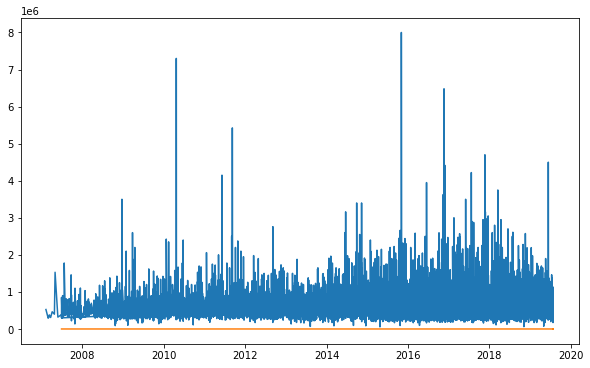

In [31]:
prediction_arima = np.exp(prediction_arima_log )
prediction_arima
plt.plot(df)
plt.plot(prediction_arima)

In [32]:
df1_log

date
2007-06-27   -466320.705266
2007-06-27   -493403.013675
2007-06-28   -532986.452369
2007-06-30   -548736.844202
2007-07-02   -583736.407633
                  ...      
2019-07-25   -423811.877637
2019-07-25   -432978.430975
2019-07-26   -433395.283648
2019-07-26   -437895.047152
2019-07-26   -456648.939382
Name: price, Length: 29569, dtype: float64

<AxesSubplot:xlabel='date'>

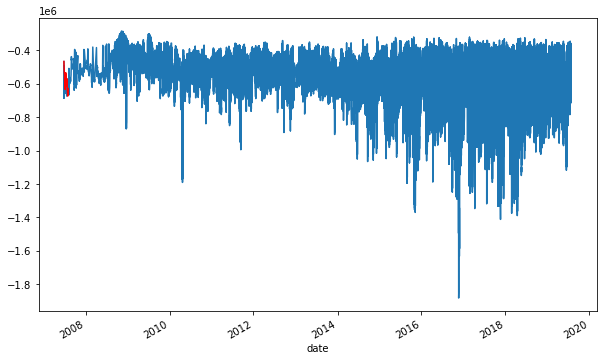

In [33]:
df1_log.plot()
result.predict(1,20).plot(color='r')

In [34]:
print("Predicted Price pct Change")
def plotARMA(df1_log):
    result = df1_log
    result = result.rolling(window=100).mean().dropna()
    mod = sm.tsa.arima.ARIMA(result,order=(2,0,0))
    res = mod.fit()
    
    df1_log.plot()
    res.predict().plot()
    
    fig,ax = plt.subplots(figsize=(20,20))
    plt.legend(fontsize=8)
    plt.title('ARMA')
    plt.show()

Predicted Price pct Change


C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

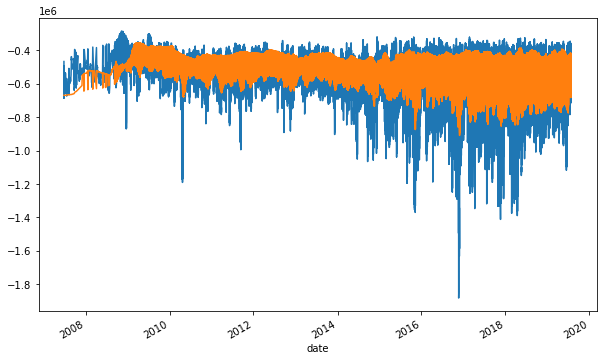

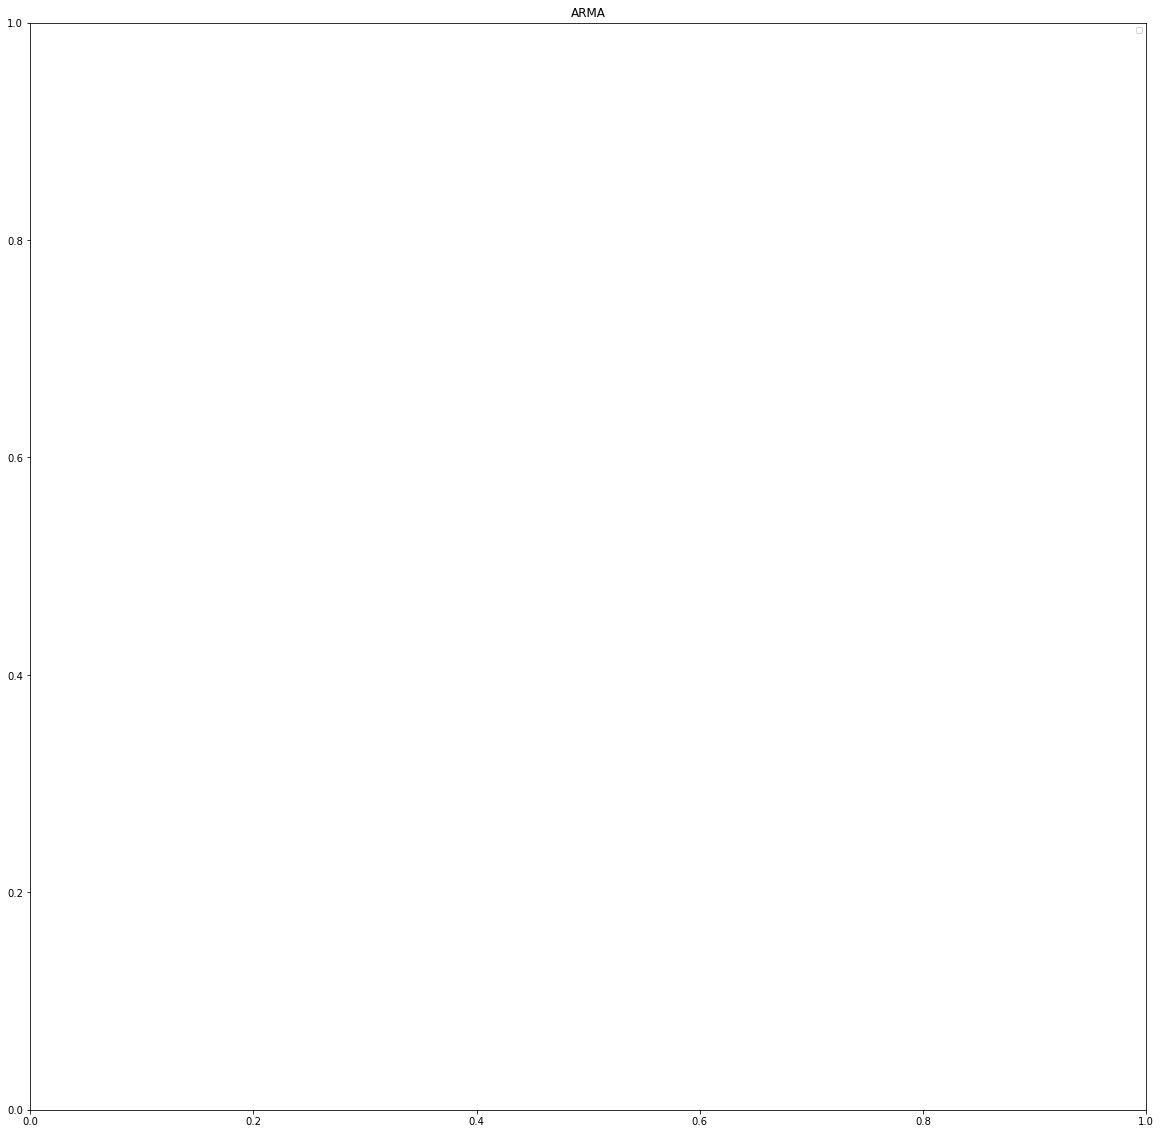

In [35]:
 plotARMA(df1_log)

In [39]:
x[1]

NameError: name 'x' is not defined